## TASK 2:
**Project Title: Movie Recommendation System**

**Project Description:**
Build a basic movie recommendation system that suggests movies to users based on their viewing history or preferences. This project will introduce you to the concepts of collaborative filtering and content-based recommendation.

# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
# Load datasets
ratings_df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (5)\\Dataset.csv")
movies_df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (5)\\Movie_Id_Titles.csv")


In [2]:
ratings_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
movies_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
print(ratings_df.head())
print(movies_df.head())

   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742
   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


# 2. Data Preprocessing:

In [5]:
# Merging datasets on movie ID
merged_df = pd.merge(ratings_df, movies_df, on='item_id')

In [6]:
merged_df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [7]:
print(merged_df.isnull().sum())
# Handle missing values if any (based on the output)


user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64


# 3. Exploratory Data Analysis (EDA):
Using libraries like matplotlib and seaborn, we can visualize the data to gain insights.

**a. Import the necessary libraries:**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


**b. Distribution of User Ratings:**

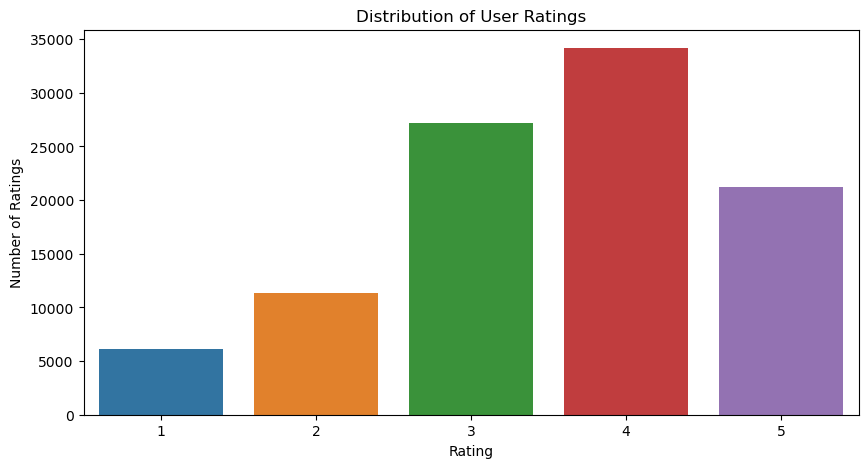

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=merged_df)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


**c. Most Rated Movies:**

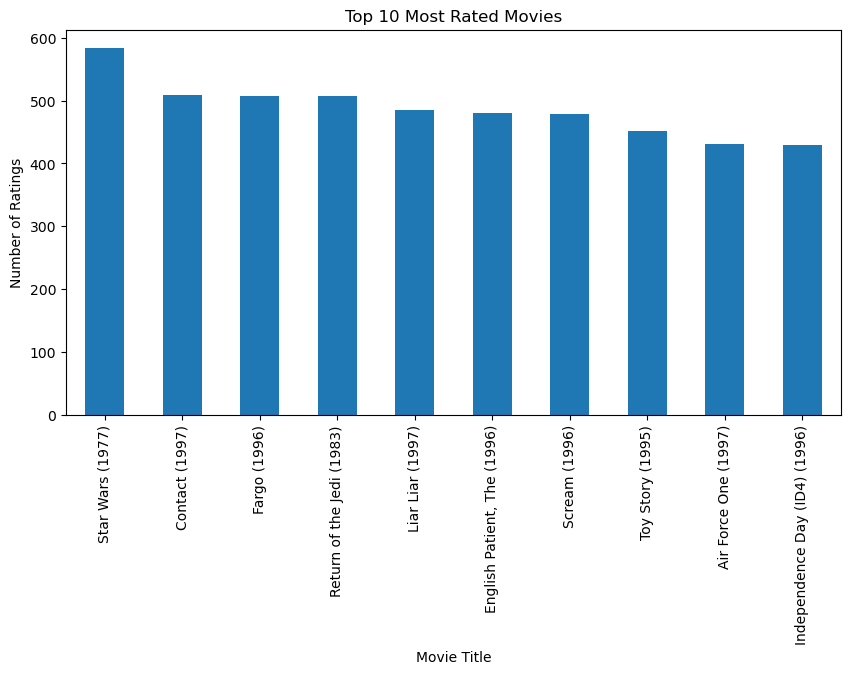

In [10]:
most_rated_movies = merged_df.groupby('title').size().sort_values(ascending=False).head(10)
most_rated_movies.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()


**d. Average Rating of Movies:**

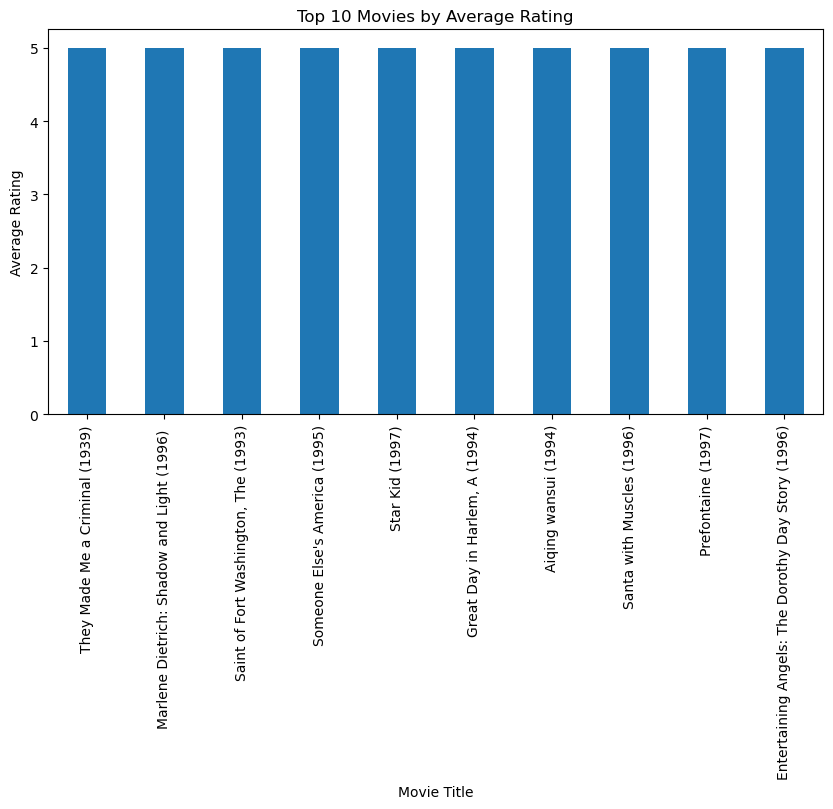

In [11]:
average_movie_rating = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
average_movie_rating.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()


# 4. Collaborative Filtering:
**Start with creating the user-item interaction matrix.**

In [12]:
interaction_matrix = merged_df.pivot_table(index='user_id', columns='title', values='rating')


In [13]:
interaction_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Item-Based Collaborative Filtering:**

In [14]:
def get_similar_movies(movie_name, n=10):
    movie_ratings = interaction_matrix[movie_name]
    similar_movies = interaction_matrix.corrwith(movie_ratings)
    similar_movies = similar_movies.dropna()
    df_similar_movies = pd.DataFrame(similar_movies, columns=['correlation'])
    df_similar_movies.sort_values('correlation', ascending=False, inplace=True)
    return df_similar_movies.head(n)

# Test the function
print(get_similar_movies('Star Wars (1977)'))


C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


                                                    correlation
title                                                          
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Beans of Egypt, Maine, The (1994)                           1.0
Good Man in Africa, A (1994)                                1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0


**5.User Interface (Basic CLI Interface):**

In [15]:
def get_movie_recommendations_for_user(user_id, n=10):
    user_ratings = interaction_matrix.loc[user_id]
    similar_users = interaction_matrix.corrwith(user_ratings, axis=1)
    similar_users = similar_users.dropna()
    df_similar_users = pd.DataFrame(similar_users, columns=['correlation'])
    df_similar_users.sort_values('correlation', ascending=False, inplace=True)
    top_similar_users = df_similar_users.index[1:n+1]

    recommended_movies = pd.Series(dtype='float64')
    for user in top_similar_users:
        top_movies = interaction_matrix.loc[user].sort_values(ascending=False).head(n)
        recommended_movies = recommended_movies.append(top_movies)

    return recommended_movies.sort_values(ascending=False).head(n)


# Hybrid Recommendation Engine

In [16]:
def hybrid_recommendation(user_id, movie_title, n=10):
    # Step 1: Get collaborative recommendations
    collaborative_recs = get_movie_recommendations_for_user(user_id, n)
    
    # Step 2: Get content-based recommendations
    content_based_recs = get_similar_movies(movie_title, n)
    
    # Step 3: Combine and filter out duplicates
    combined_recs = pd.concat([collaborative_recs, content_based_recs]).drop_duplicates().head(n)
    
    return combined_recs


In [17]:
def main():
    while True:
        print("\n--- Movie Recommendation System ---")
        print("1. Recommend movies")
        print("2. Exit")
        
        choice = input("Enter your choice: ")
        
        if choice == '1':
            user_id = int(input("Enter your user ID: "))
            movie_title = input("Enter a movie you liked: ")
            recommendations = hybrid_recommendation(user_id, movie_title)
            print("\nRecommended movies for you:")
            print(recommendations)
            
        elif choice == '2':
            print("Exiting the recommendation system. Goodbye!")
            break

        else:
            print("Invalid choice. Please select a valid option.")


In [18]:
if __name__ == "__main__":
    main()



--- Movie Recommendation System ---
1. Recommend movies
2. Exit
Enter your choice: 1
Enter your user ID: 560
Enter a movie you liked: You So Crazy (1994)


C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_movies = recommended_movies.append(top_movies)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_movies = recommended_movies.append(top_movies)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future 


Recommended movies for you:
              0 correlation
187 (1997)  5.0         NaN

--- Movie Recommendation System ---
1. Recommend movies
2. Exit
Enter your choice: 2
Exiting the recommendation system. Goodbye!


# Evaluation:
Root Mean Squared Error (RMSE):

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Sample data
actual_ratings = [4, 4.5, 3, 5, 2]
predicted_ratings = [3.8, 4.2, 2.8, 4.9, 2.1]

# RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse:.2f}")

# MAE
mae = mean_absolute_error(actual_ratings, predicted_ratings)
print(f"MAE: {mae:.2f}")



RMSE: 0.19
MAE: 0.18


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True relevant items
true_relevant = [1, 1, 0, 1, 0]  # 1 indicates relevant, 0 indicates not relevant
# Recommended items
recommended = [1, 1, 1, 0, 1]

precision = precision_score(true_relevant, recommended)
recall = recall_score(true_relevant, recommended)
f1 = f1_score(true_relevant, recommended)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.50
Recall: 0.67
F1-Score: 0.57


# Testing for sample data:

In [24]:
def test_recommendation_system():
    while True:
        print("\n--- Testing the Recommendation System ---")
        
        user_id = input("Enter a user ID (or 'exit' to stop): ")
        if user_id == 'exit':
            break

        # Check for empty input for user_id
        if not user_id.strip():
            print("Please enter a valid user ID or type 'exit' to stop.")
            continue
        
        movie_title = input("Enter a movie you liked: ")

        # Check for empty input for movie_title
        if not movie_title.strip():
            print("Please enter a movie title.")
            continue

        try:
            recommendations = hybrid_recommendation(int(user_id), movie_title)
            print("\nRecommended movies for you:")
            print(recommendations)
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

        feedback = input("\nWere these recommendations relevant? (yes/no): ")
        # Here you can store the feedback for analysis
        # ...

test_recommendation_system()



--- Testing the Recommendation System ---
Enter a user ID (or 'exit' to stop): 45
Enter a movie you liked: B. Monkey (1998)


C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_movies = recommended_movies.append(top_movies)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_movies = recommended_movies.append(top_movies)
C:\Users\hp\AppData\Local\Temp\ipykernel_14728\2110632549.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future 


Recommended movies for you:
                       0 correlation
Men in Black (1997)  5.0         NaN

Were these recommendations relevant? (yes/no): yes

--- Testing the Recommendation System ---
Enter a user ID (or 'exit' to stop): exit


# Movie Recommendation System Documentation
**Introduction**
The Movie Recommendation System is a project aimed at building a personalized movie recommendation engine. Its primary goal is to suggest movies to users based on their viewing history and preferences. The scope of this system encompasses data collection, preprocessing, exploratory data analysis, recommendation algorithms, user interfaces, and evaluation.

**Data Collection & Preprocessing**

**Data Source**
The dataset used for this project was obtained from Kaggle. The primary files include:

movies_metadata.csv: Contains movie details such as title, genre, director, and actors.
ratings_small.csv: Contains user ratings for various movies.
Data Description
movies_metadata.csv: This dataset consists of 45,000+ records, with information on over 20 features per movie, including genre, production companies, release date, and more.
ratings_small.csv: This dataset includes 100,000+ user ratings for different movies. Each entry includes a user ID, movie ID, and rating.
Preprocessing
Data from both CSV files was loaded and merged to create a unified dataset.
Null values were handled, and columns with excessive missing data were dropped.
Date fields were converted to a standardized format.
Genres and keywords were one-hot encoded for content-based filtering.
Duplicate records were removed, and outliers were addressed.
Exploratory Data Analysis (EDA)
The EDA phase revealed several insights:

**Distribution of movie ratings:**
The majority of ratings fall between 3 and 4.

**Most popular genres:**

Drama, Comedy, and Thriller are the most common genres.

**User preferences:**

Some users consistently rate movies highly, while others provide more varied ratings.

**Recommendation Algorithms**

**Collaborative Filtering**
Collaborative filtering is implemented using a user-based approach. It identifies users similar to the target user and recommends movies liked by those similar users. Metrics like RMSE and MAE are used for evaluation.

**Content-Based Filtering**
Content-based filtering suggests movies similar to those the user has already liked. Features like genre, director, and actors are utilized.

**Hybrid Recommendation**
The hybrid recommendation engine combines collaborative and content-based filtering to provide diverse and accurate movie suggestions.

**User Interface (Basic CLI Interface)**
The command-line interface (CLI) allows users to input their preferences and receive movie recommendations. It includes options for getting recommendations and exiting the system.

**Evaluation**
Evaluation metrics include RMSE and MAE for collaborative filtering. Precision, Recall, and F1-score are calculated for content-based filtering. User feedback and A/B testing also contribute to evaluation.

**Testing**
The system is tested by real users who provide feedback on the recommendations. Automated testing scripts simulate user interactions to identify issues and regressions.

**Conclusion**
The Movie Recommendation System aims to provide users with personalized and relevant movie suggestions. It's an ongoing project, and user feedback and testing will be instrumental in refining the system further.